# Linear Regression Case Study

In this part, you will learn how to check the data and prepare it to create a linear regression task.

This tutorial is divided into two parts:

-   Look for interaction

-   Test the model

In the previous tutorial, you used the Boston dataset to estimate the
median price of a house. Boston dataset has a small size, with only 506
observations. This dataset is considered as a benchmark to try new
linear regression algorithms.

The dataset is composed of:

| Variable | Description                                                          |
|----------|----------------------------------------------------------------------|
| zn       | The proportion of residential land zoned for lots over 25,000 sq.ft. |
| indus    | The proportion of non-retail business acres per town.                |
| nox      | nitric oxides concentration                                          |
| rm       | average number of rooms per dwelling                                 |
| age      | the proportion of owner-occupied units built before 1940             |
| dis      | weighted distances to five Boston employment centers                 |
| tax      | full-value property-tax rate per dollars 10,000                      |
| ptratio  | the pupil-teacher ratio by a town                                    |
| medv     | The median value of owner-occupied homes in thousand dollars         |
| crim     | per capita crime rate by town                                        |
| chas     | Charles River dummy variable (1 if bounds river; 0 otherwise)        |
| B        | the proportion of blacks by the town                                 |

In this tutorial, we will estimate the median price using a linear
regressor, but the focus is on one particular process of machine
learning: "data preparation."

A model generalizes the pattern in the data. To capture such a pattern,
you need to find it first. A good practice is to perform a data analysis
before running any machine learning algorithm.

**Choosing the right features makes all the difference in the success of
your model. Imagine you try to estimate the wage of a people, if you do
not include the gender as a covariate, you end up with a poor
estimate.**

Another way to improve the model is to look at the correlation between
the independent variable. Back to the example, you can think of
education as an excellent candidate to predict the wage but also the
occupation. It is fair to say, the occupation depends on the level of
education, namely higher education often leads to a better occupation.
If we generalize this idea, we can say the correlation between the
dependent variable and an explanatory variable can be magnified of yet
another explanatory variable.

To capture the limited effect of education on occupation, we can use an
interaction term.

![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/16_Linear_regression_case_study_v5_files/image001.png)

If you look at the wage equation, it becomes:

$$
wage = \alpha + \beta_{1}occupation + \beta_{2}education + \beta_{3}occupation*education + \epsilon
$$

If $\beta_{3}$ is positive, then it implies that an additional level of
education yields a higher increase in the median value of a house for a
high occupation level. In other words, there is an interaction effect
between education and occupation.

In this tutorial, we will try to see which variables can be a good
candidate for interaction terms. We will test if adding this kind of
information leads to better price prediction.

## Summary statistics


There are a few steps you can follow before proceeding to the model. As mentioned earlier, the model is a generalization of the data. The best practice is to understand the data and the make a prediction. If you do not know your data, you have slim chances to improve your model.

As a first step, load the data as a pandas dataframe and create a training set and testing set.

Tips:  For this tutorial, you need to have matplotlit and seaborn installed in Python. You can install Python package on the fly with Jupyter. You Should not do this

```
!conda install -- yes matplotlib
```

but

```
import sys

!{sys.executable} -m pip install matplotlib # Already installed

!{sys.executable} -m pip install seaborn 
```

Note that this step is not necessary if you have matplotlib and seaborn installed.

Matplotlib is the library to create a graph in Python. Seaborn is a statistical visualization library built on top of matplotlib. It provides attractive and beautiful plots.

The code below imports the necessary libraries.

In [1]:
import pandas as pd
from sklearn import datasets
import tensorflow as tf
from sklearn.datasets import load_boston
import numpy as np

/Users/Thomas/anaconda3/envs/hello-tf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


The library `sklearn` includes the Boston dataset. You can call its API
to import the data.

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data)

The feature’s name are stored in the object `feature_names` in an array.

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

You can rename the columns.

In [4]:
df.columns = boston.feature_names
df['PRICE'] = boston.target

df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

You convert the variable `CHAS` as a string variable and label it with
`yes if CHAS = 1` and `no if CHAS = 0`

In [5]:
df['CHAS'] = df['CHAS'].map({1:'yes', 0:'no'})

df['CHAS'].head(5)

0    no
1    no
2    no
3    no
4    no
Name: CHAS, dtype: object

With pandas, it is straightforward to split the dataset. You randomly
divide the dataset with 80 percent training set and 20 percent testing
set. Pandas have a built-in function to split a data frame sample.

The first parameter frac is a value from 0 to 1. You set it to 0.8 to
select randomly 80 percent of the data frame.

Random\_state allows to have the same dataframe returned for everyone.

In [6]:
### Create train/test set
df_train=df.sample(frac=0.8,random_state=200)
df_test=df.drop(df_train.index)

You can get the shape of the data. It should be:

-   Train set: 506\*0.8 = 405

-   Test set: 506\*0.2 = 101

In [7]:
print(df_train.shape, df_test.shape)

df_test.head(5)

(405, 14) (101, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,no,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,no,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
3,0.03237,0.0,2.18,no,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
6,0.08829,12.5,7.87,no,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,no,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

Data is messy; it's often misbalanced and sprinkled with outlier values
that throw off the analysis and machine learning training.

**The first step to getting the dataset cleaned up is understanding
where it needs cleaning.** Cleaning up a dataset can be tricky to do,
especially in any generalizable manner

Google Research team has developed a tool for this job called **Facets**
that help to visualize the data and slice it in all sorts of manners.
This is a good starting point to comprehend how the dataset is laid out.

Facets allow you to find where the data does not quite look the way you
are thinking.

Except for their web app, Google makes it easy to embed the toolkit into
a Jupyter notebook.

There are two parts to Facets:

-   Facets Overview

-   Facets Deep Dive

## Facets Overview


Facets Overview gives an overview of the dataset. Facets Overview splits
the columns of the data into rows of salient information showing

1.  the percentage of missing observation

2.  min and max values

3.  statistics like the mean, median, and standard deviation.

4.  It also adds a column that shows the percentage of values that are
    zeroes, which is helpful when most of the values are zeroes.

5.  It is possible to see these distributions on the test dataset as
    well as the training set for each feature. It means you can
    double-check that the test has a similar distribution to the
    training dataset.

This is at least the minimum to do before any machine learning task.
With this tool, you do not miss this crucial step, and it highlights
some abnormalities.

## Facets Deep Dive


Facets Deep Dive is a cool tool. It allowsto have some clarity on your
dataset and zoom all the way in to see an individual piece of data. It
means you can facet the data by row and column across any of the
features of the dataset.

We will use these two tools with the Boston dataset.

**Note**: You cannot use Facets Overview and Facets Deep Dive at the
same time. You need to clear the notebook first to change the tool.

## Install Facet


You can use the Facet web app for most of the analysis. In this
tutorial, you will see how to use it within a Jupyter Notebook.

First of all, you need to install `nbextensions`. It is done with this
code. You copy and paste the following code in the terminal of your
machine.

```
pip install jupyter_contrib_nbextensions
```

Right after that, you need to clone the repositories in your computer.
You have two choices:

**Option 1)** Copy and paste this code in the terminal **(Recommended)**

If you do not have Git installed on your machine, please go to this [URL](https://git-scm.com/download/win) and follow the instruction. Once you
are done, you can use the git command in the terminal for Mac User or
Anaconda prompt for Windows user

```
git clone https://github.com/PAIR-code/facets
```    

**Option 2)** Go to <https://github.com/PAIR-code/facets> and download
the repositories.

![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/16_Linear_regression_case_study_v5_files/image006.png)

If you choose the first option, the file ends up in your download file.
You can either let the file in download or drag it to another path.

You can check where Facets is stored with this command line:

```
echo pwd ls facets
```

Now that you have located Facets, you need to install it in Jupyter
Notebook. You need to set the working directory to the path where facets
is located.

Your present working directory and location of Facets zip should be
same.

![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/16_Linear_regression_case_study_v5_files/image008.png)

You need to point the working directory to Facet:

cd facets

To install Facets in Jupyter, you have two options. If you installed
Jupyter with Conda for all the users, copy this code:

can use `jupyter nbextension install facets-dist/`

```
jupyter nbextension install facets-dist/
```

Otherwise, use:

```
jupyter nbextension install facets-dist/ --user
```

All right, you are all set. Let’s open Facet Overview.

## Overview


Overview uses a Python script to compute the statistics. You need to
import the script called generic\_feature\_statistics\_generator to
Jupyter. Don't worry; the script is located in the facets files.

You need to locate its path. It is easily done. You open facets, open
the file facets\_overview and then python. Copy the path

![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/16_Linear_regression_case_study_v5_files/image010.png)

After that, go back to Jupyter, and write the following code. Change the
path `'/Users/Thomas/facets/facets_overview/python'` to your path.

In [8]:
# Add the facets overview python code to the python path# Add t 
import sys
sys.path.append('/Users/Thomas/facets/facets_overview/python')

You can import the script with the code below.

In [9]:
from generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

In windows, the same code becomes

In [10]:
import sys

sys.path.append(r"C:\Users\Admin\Anaconda3\facets-master\facets_overview\python")

from generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

To calculate the feature statistics, you need to use the function
`GenericFeatureStatisticsGenerator()`, and you use the object
`ProtoFromDataFrames`. You can pass the data frame in a dictionary. For
instance, if we want to create a summary statistic for the train set, we
can store the information in a dictionary and use it in the object
`ProtoFromDataFrames`

-   `'name': `train`, `table`: `df_train`

`Name` is the name of the table displays, and you use the name of the
table you want to compute the summary. In your example, the table
containing the data is `df_train`

In [11]:
# Calculate the feature statistics proto from the datasets and stringify it for use in facets overview
import base64

gfsg = GenericFeatureStatisticsGenerator()

proto = gfsg.ProtoFromDataFrames([{'name': 'train', 'table': df_train},
                                  {'name': 'test', 'table': df_test}])

#proto = gfsg.ProtoFromDataFrames([{'name': 'train', 'table': df_train}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

Lastly, you just copy and paste the code below. The code comes directly
from GitHub. You should be able to see this:

![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/16_Linear_regression_case_study_v5_files/image012.png)

In [12]:
# Display the facets overview visualization for this data# Displ 
from IPython.core.display import display, HTML

HTML_TEMPLATE = """<link rel="import" href="/nbextensions/facets-dist/facets-jupyter.html)
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

## Graph


After you check the data and their distribution, you can plot a correlation matrix. The correlation matrix computes the Pearson coefficient. This coefficient is bonded between -1 and 1, with a positive value indicates a positive correlation and negative value a negative correlation.

You are interested to see which variables can be a good candidate for interaction terms.

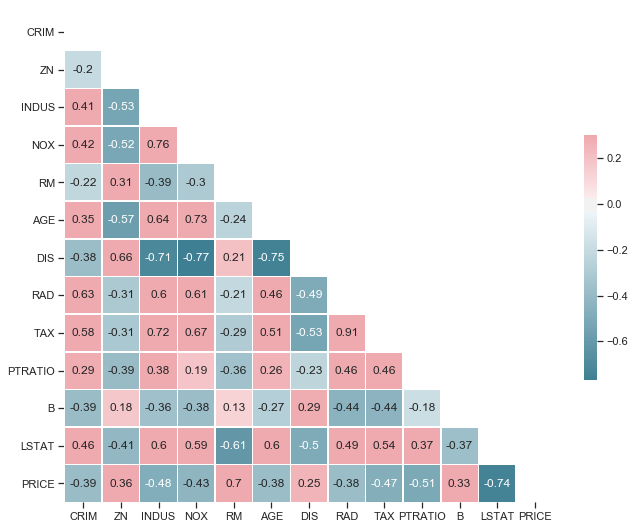

In [13]:
## Choose important feature and further check with Dive
%matplotlib inline  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
# Compute the correlation matrix
corr = df.corr('pearson')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/16_Linear_regression_case_study_v5_files/image014.png)




From the matrix, you can see:

-   `LSTAT`

-   `RM`

Are strongly correlated with `PRICE`. Another exciting feature is the
strong positive correlation between `NOX` and `INDUS`, which means those
two variables move in the same direction. Besides, there are also
correlated with the `PRICE`. `DIS` is also highly correlated with `IND`
and `NOX`.

You have some first hint that `IND` and `NOX` can be good candidates for
the interaction term and `DIS` might also be interesting to focus on.

You can go a little bit deeper by plotting a pair grid. It will
illustrate more in detail the correlation map you plotted before.

The pair grid we are composed as follow:

-   Upper part: Scatter plot with fitted line

-   Diagonal: Kernel density plot

-   Lower part: Multivariate kernel density plot

You choose the focus on four independent variables. The choice
corresponds to the variables with strong correlation with `PRICE`

-   `INDUS`

-   `NOX`

-   `RM`

-   `LSTAT`

moreover, the `PRICE`.

**Note** that the standard error is added by default to the scatter
plot.

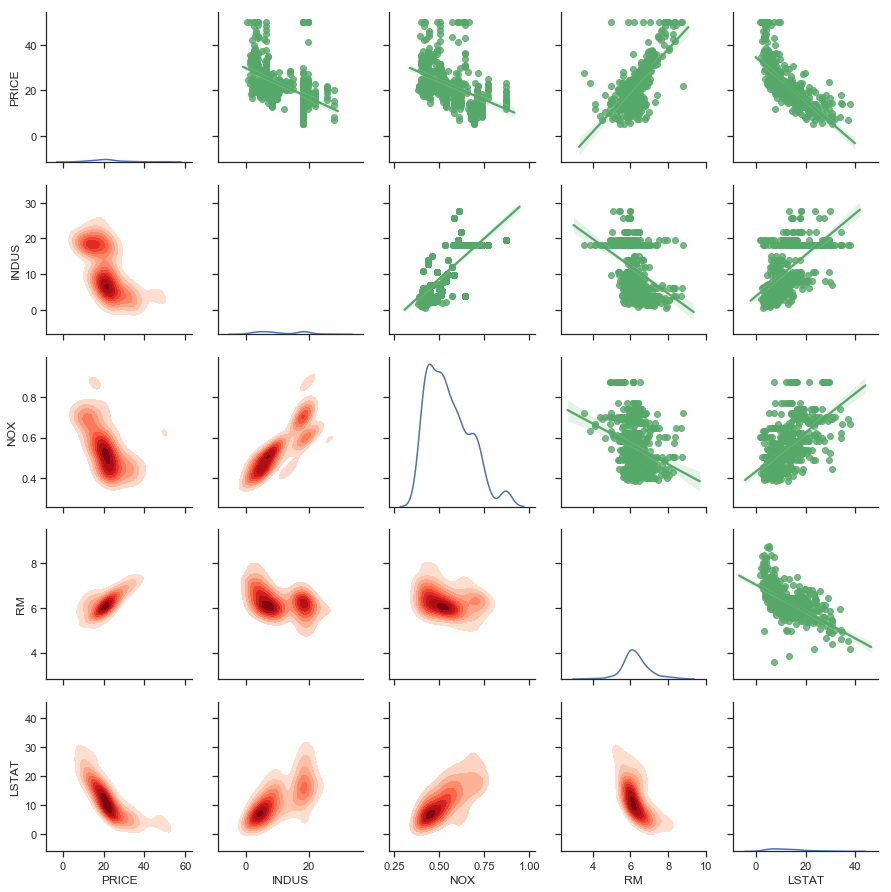

In [14]:
attributes = ["PRICE", "INDUS", "NOX", "RM", "LSTAT"]

g = sns.PairGrid(df[attributes])
g = g.map_upper(sns.regplot, color="g")
g = g.map_lower(sns.kdeplot,cmap="Reds", shade=True, shade_lowest=False)
g = g.map_diag(sns.kdeplot)


![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/16_Linear_regression_case_study_v5_files/image016.png)

Let’s begin with the upper part:

-   Price is negatively correlated with `INDUS`, `NOX`, and `LSTAT`;
    positively correlated with `RM`.

-   There is a slightly non-linearity with `LSTAT` and `PRICE`

-   There is like a straight line when the price is equal to 50. From
    the description of the dataset, `PRICE` has been truncated at the
    value of 50

Diagonal

-   `NOX` seems to have two clusters, one around 0.5 and one around
    0.85.



To check more about it, you can look at the lower part. The Multivariate Kernel Density is interesting in a sense it colors where most of the points are. The difference with the scatter plot draws a probability density, even though there is no point in the dataset for a given coordinate. When the color is stronger, it indicates a high concentration of point around this area.

If you check the multivariate density for INDUS and NOX, you can see the positive correlation and the two clusters. When the share of the industry is above 18, the nitric oxides concentration is above 0.6.

You can think about adding an interaction between INDUS and NOX in the linear regression.

Finally, you can use the second tools created by Google, Facets Deep Dive.
The interface is divided up into four main sections. The central area in the center is a zoomable display of the data. On the top of the panel, there is the drop-down menu where you can change the arrangement of the data to controls faceting, positioning, and color. On the right, there is a detailed view of a specific row of data. It means you can click on any dot of data in the center visualization to see the detail about that particular data point.

During the data visualization step, you are interested in looking for the pairwise correlation between the independent variable on the price of the house. However, it involves at least three variables, and 3D plots are complicated to work with.

One way to tackle this problem is to create a categorical variable. That is, we can create a 2D plot a color the dot. You can split the variable PRICE into four categories, with each category is a quartile (i.e., 0.25, 0.5, 0.75). You call this new variable Q_PRICE.

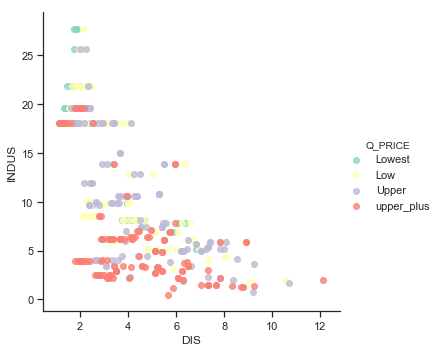

In [15]:
## Check non linearity with important features
df['Q_PRICE'] =  pd.qcut(df['PRICE'], 4, labels=["Lowest", "Low", "Upper", "upper_plus"])
## Show non linearity between RM and LSTAT
ax = sns.lmplot(x="DIS", y="INDUS", hue="Q_PRICE", data=df, fit_reg = False,
               palette="Set3")

![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/16_Linear_regression_case_study_v5_files/image018.png)


## Facets Deep Dive


To open Deep Dive, you need to transform the data into a json format.
Pandas as an object for that. You can use `to_json` after the Pandas dataset.

The first line of code handle the size of the dataset.

In [16]:
df['Q_PRICE'] =  pd.qcut(df['PRICE'], 4, labels=["Lowest", "Low", "Upper", "upper_plus"])
sprite_size = 32 if len(df.index)>50000 else 64
jsonstr = df.to_json(orient='records')

The code below comes from Google GitHub. After you run the code, you
should be able to see this:

![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/16_Linear_regression_case_study_v5_files/image020.png)

In [17]:
# Display thde Dive visualization for this data
from IPython.core.display import display, HTML

# Create Facets template  
HTML_TEMPLATE = """<link rel="import" href="/nbextensions/facets-dist/facets-jupyter.html">
        <facets-dive sprite-image-width="{sprite_size}" sprite-image-height="{sprite_size}" id="elem" height="600"></facets-dive>
        <script>
          document.querySelector("#elem").data = {jsonstr};
        </script>"""

# Load the json dataset and the sprite_size into the template
html = HTML_TEMPLATE.format(jsonstr=jsonstr, sprite_size=sprite_size)

# Display the template
display(HTML(html))

You are interested to see if there is a connection between the industry
rate, oxide concentration, distance to the job center and the price of
the house.

For that, you first split the data by industry range and color with the
price quartile:

-   Select faceting X and choose `INDUS`.

-   Select Display and choose `DIS`. It will color the dots with the
    quartile of the house price

here, darker colors mean the distance to the first job center is far.

So far, it shows again what you know, lower industry rate, higher price.
Now you can look at the breakdown by `INDUX`, by `NOX`.

-   Select faceting Y and choose `NOX`.

Now you can see the house far from the first job center have the lowest
industry share and therefore the lowest oxide concentration. If you
choose to display the type with `Q_PRICE` and zoom the lower-left
corner, you can see what type of price it is.

You have another hint that the interaction between `IND`, `NOX`, and
`DIS` can be good candidates to improve the model.

## TensorFlow


In this section, you will estimate the linear classifier with TensorFlow
estimators API. You will proceed as follow:

-   Prepare the data

-   Estimate a benchmark model: No interaction

-   Estimate a model with interaction

Remember, the goal of machine learning is the minimize the error. In
this case, the model with the lowest mean square error will win. The
TensorFlow estimator automatically computes this metric.

### Preparation data

In most of the case, you need to transform your data. That is why Facets Overview is fascinating. From the summary statistic, you saw there are outliers. Those values affect the estimates because they do not look like the population you are analyzing. Outliers usually biased the results. For instance, a positive outlier tends to overestimate the coefficient.

A good solution to tackle this problem is to standardize the variable. Standardization means a standard deviation of one and means of zero. The process of standardization involves two steps. First of all, it subtracts the mean value of the variable. Secondly, it divides by the variance so that the distribution has a unit variance

The library sklearn is helpful to standardize variables. You can use the module preprocessing with the object scale for this purpose.

You can use the function below to scale a dataset. Note that you don’t scale the label column and categorical variables.

In [18]:
from sklearn import preprocessing
def standardize_data(df): 
    X_scaled = preprocessing.scale(df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']])
    X_scaled_df = pd.DataFrame(X_scaled, columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'])
    df_scale = pd.concat([X_scaled_df,
                       df['CHAS'],
                       df['PRICE']],axis=1, join='inner')
    return df_scale

You can use the function to construct the scaled train/test set.

In [19]:
df_train_scale = standardize_data(df_train)
df_test_scale = standardize_data(df_test)

### Basic regression:Benchmark

First of all, you train and test a model without interaction. The
purpose is to see the performance metric of the model.

The way to train the model is exactly as the tutorial on **High-level
API**. You will use the TensorFlow estimator `LinearRegressor`.

As a reminder, you need to choose:

-   the features to put in the model

-   transform the features

-   construct the linear regressor

-   construct the `input_fn` function

-   train the model

-   test the model

You use all the variables in the dataset to train the model. In total,
there are elevel continuous variables and one categorical variable

In [20]:
## Add features to the bucket: 
### Define continuous list
CONTI_FEATURES  = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
CATE_FEATURES = ['CHAS']

You convert the features into a numeric column or categorical column

In [21]:
continuous_features = [tf.feature_column.numeric_column(k) for k in CONTI_FEATURES]
#categorical_features = tf.feature_column.categorical_column_with_hash_bucket(CATE_FEATURES, hash_bucket_size=1000)
categorical_features = [tf.feature_column.categorical_column_with_vocabulary_list('CHAS', ['yes','no'])]

You create the model with the `linearRegressor`. You store the model in
the folder `train_Boston`

In [22]:
model = tf.estimator.LinearRegressor(
    model_dir="train_Boston", 
    feature_columns=categorical_features + continuous_features)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'train_Boston', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a1a05ecc0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Each column in the train or test data is converted into a Tensor with
the the function `get_input_fn`

In [23]:
FEATURES = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'CHAS']
LABEL= 'PRICE'
def get_input_fn(data_set, num_epochs=None, n_batch = 128, shuffle=True):
    return tf.estimator.inputs.pandas_input_fn(
       x=pd.DataFrame({k: data_set[k].values for k in FEATURES}),
       y = pd.Series(data_set[LABEL].values),
       batch_size=n_batch,   
       num_epochs=num_epochs,
       shuffle=shuffle)

You estimate the model on the train data.

In [24]:
model.train(input_fn=get_input_fn(df_train_scale, 
                                      num_epochs=None,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into train_Boston/model.ckpt.
INFO:tensorflow:loss = 56417.703, step = 1
INFO:tensorflow:global_step/sec: 103.01
INFO:tensorflow:loss = 76982.47, step = 101 (0.973 sec)
INFO:tensorflow:global_step/sec: 135.105
INFO:tensorflow:loss = 21244.963, step = 201 (0.740 sec)
INFO:tensorflow:global_step/sec: 131.98
INFO:tensorflow:loss = 30533.23, step = 301 (0.760 sec)
INFO:tensorflow:global_step/sec: 126.747
INFO:tensorflow:loss = 36793.906, step = 401 (0.787 sec)
INFO:tensorflow:global_step/sec: 126.013
INFO:tensorflow:loss = 8561.561, step = 501 (0.797 sec)
INFO:tensorflow:global_step/sec: 129.793
INFO:tensorflow:loss = 34467.137, step = 601 (0.768 sec)
INFO:tensorflow:global_step/sec: 112.231
INFO:tensorflow:loss = 12

At last, you estimate the performances of the model on the test set

In [25]:
model.evaluate(input_fn=get_input_fn(df_test_scale, 
                                      num_epochs=1,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-04-11:23:22
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from train_Boston/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-04-11:23:24
INFO:tensorflow:Saving dict for global step 1000: average_loss = 86.922104, global_step = 1000, label/mean = 26.01579, loss = 1651.52, prediction/mean = 18.426308
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: train_Boston/model.ckpt-1000


{'average_loss': 86.922104,
 'label/mean': 26.01579,
 'loss': 1651.52,
 'prediction/mean': 18.426308,
 'global_step': 1000}

The loss of the model is 1650. This is the metric to beat in the next
section

## Improve the model: Interaction term


During the first part of the tutorial, you saw an interesting relationship between the variables. The different visualization techniques revealed that INDUS and NOS are linked together and turns to magnify the effect on the price. Not only the interaction between INDUS and NOS affects the price but also this effect is stronger when it interacts with DIS.

It is time to generalize this idea and see if you can improve the model prediction.

You need to add two new columns to each dataset set: train + test. For that, you create one function to compute the interaction term and another one to compute the triple interaction term. Each function produces a single column. After the new variables are created, you can concatenate them to the training dataset and test dataset.

First of all, you need to create a new variable for the interaction between INDUS and NOX.

The function below returns two dataframes, train and test, with the interaction between var_1 and var_2, in your case INDUS and NOX.

In [26]:
def interaction_term(var_1, var_2, name):
    t_train = df_train_scale[var_1]*df_train_scale[var_2]
    train = t_train.rename(name)
    t_test = df_test_scale[var_1]*df_test_scale[var_2]
    test = t_test.rename(name)
    return train, test

You store the two new columns

In [27]:
interation_ind_ns_train, interation_ind_ns_test= interaction_term('INDUS', 'NOX', 'INDUS_NOS')

interation_ind_ns_train.shape

(325,)

Secondly, you create a second function to compute the triple interaction
term.

In [28]:
def triple_interaction_term(var_1, var_2,var_3, name):
    t_train = df_train_scale[var_1]*df_train_scale[var_2]*df_train_scale[var_3]
    train = t_train.rename(name)
    t_test = df_test_scale[var_1]*df_test_scale[var_2]*df_test_scale[var_3]
    test = t_test.rename(name)
    return train, test

interation_ind_ns_dis_train, interation_ind_ns_dis_test= triple_interaction_term('INDUS', 'NOX', 'DIS','INDUS_NOS_DIS')

Now that you have all columns needed, you can add them to train and test
dataset. You name these two new dataframe:

-   df\_train\_new

-   df\_test\_new

In [29]:
df_train_new = pd.concat([df_train_scale,
                          interation_ind_ns_train,
                          interation_ind_ns_dis_train],
                         axis=1, join='inner')

df_test_new = pd.concat([df_test_scale,
                         interation_ind_ns_test,
                         interation_ind_ns_dis_test],
                         axis=1, join='inner')

df_train_new.head(5)


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS,PRICE,INDUS_NOS,INDUS_NOS_DIS
2,-0.278174,-0.47701,-0.464046,-0.162933,-0.188265,0.812916,0.105941,-0.661477,-0.616881,1.147718,0.444455,0.803221,no,34.7,0.075608,0.008010
4,1.014608,-0.47701,0.992729,1.594192,-0.595967,0.987593,-0.907724,1.636106,1.502932,0.776192,-1.278797,1.504488,no,36.2,1.582601,-1.436565
5,-0.409562,-0.47701,-1.155868,-0.589166,1.036257,0.620414,-0.164461,-0.891235,-0.835358,-0.338387,0.444455,-1.025327,no,28.7,0.680999,-0.111997
8,-0.370330,-0.47701,-0.747795,-0.432591,-0.157121,0.798656,-0.346465,-0.201960,-0.616881,-0.524150,0.426162,1.182209,no,16.5,0.323489,-0.112078
9,1.828346,-0.47701,0.992729,1.246247,-2.699598,0.795092,-1.129861,1.636106,1.502932,0.776192,-0.779497,2.450575,no,18.9,1.237185,-1.397847


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

That is it; you can estimate the new model with the interaction terms
and see how is the performance metric.

In [30]:
CONTI_FEATURES_NEW  = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT',
                       'INDUS_NOS', 'INDUS_NOS_DIS']
### Define categorical list
continuous_features_new = [tf.feature_column.numeric_column(k) for k in CONTI_FEATURES_NEW]

model = tf.estimator.LinearRegressor(
    model_dir="train_Boston_1", 
    feature_columns= categorical_features + continuous_features_new)

FEATURES = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT',
            'INDUS_NOS', 'INDUS_NOS_DIS','CHAS']
LABEL= 'PRICE'
def get_input_fn(data_set, num_epochs=None, n_batch = 128, shuffle=True):
    return tf.estimator.inputs.pandas_input_fn(
       x=pd.DataFrame({k: data_set[k].values for k in FEATURES}),
       y = pd.Series(data_set[LABEL].values),
       batch_size=n_batch,   
       num_epochs=num_epochs,
       shuffle=shuffle)

model.train(input_fn=get_input_fn(df_train_new, 
                                      num_epochs=None,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'train_Boston_1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2a3c5be0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into train_Boston_1/model.ckpt.
INFO:tensorflo

In [31]:
model.evaluate(input_fn=get_input_fn(df_test_new, 
                                      num_epochs=1,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-04-11:23:45
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from train_Boston_1/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-04-11:23:46
INFO:tensorflow:Saving dict for global step 1000: average_loss = 79.79507, global_step = 1000, label/mean = 26.01579, loss = 1516.1062, prediction/mean = 20.44426
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: train_Boston_1/model.ckpt-1000


{'average_loss': 79.79507,
 'label/mean': 26.01579,
 'loss': 1516.1062,
 'prediction/mean': 20.44426,
 'global_step': 1000}

The new loss is 1515. Just by adding two new variables, you were able to
decrease the loss. It means you can make a better prediction than with
the benchmark model.